In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from src.MBB import modified_black_body
from lmfit import Model

### Read the X-shooter data

In [33]:
t8_txt=np.loadtxt('Data/T8_FULL_REDUCED_SPECTRUM_ALLARM.txt')
t8=pd.DataFrame(t8_txt)
t8=t8.rename(columns={0 : "WL",
                     1 : "Flux"})
t8=t8.drop(columns=2)

### Introduce a color blind friendly palette

In [34]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

### Fit to the modified black body function and plot

[[Model]]
    Model(modified_black_body)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 394
    # data points      = 68420
    # variables        = 4
    chi-square         = 7.8257e-25
    reduced chi-square = 1.1438e-29
    Akaike info crit   = -4559544.07
    Bayesian info crit = -4559507.54
[[Variables]]
    TEMPSN:    226050.548 +/- 1088825.60 (481.67%) (init = 8000)
    RADIUSSN:  3.3716e+13 +/- 9.2607e+13 (274.67%) (init = 1e+13)
    TEMPDUST:  4388.18022 +/- 33.8741791 (0.77%) (init = 1000)
    MDUST:     3.6858e-06 +/- 1.0818e-07 (2.94%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(TEMPSN, RADIUSSN)   = -1.000
    C(TEMPDUST, MDUST)    = -0.964
    C(RADIUSSN, TEMPDUST) = -0.889
    C(TEMPSN, TEMPDUST)   =  0.888
    C(RADIUSSN, MDUST)    =  0.756
    C(TEMPSN, MDUST)      = -0.754


/Users/zoeansari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.


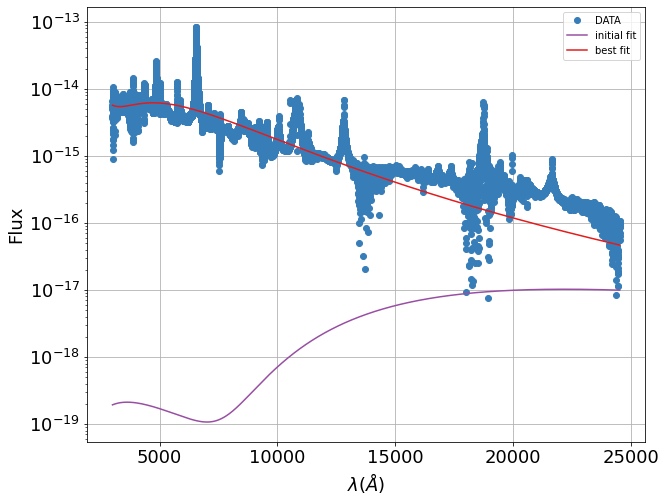

In [39]:
x_data=t8["WL"]
y_data=t8["Flux"]

####initial guess on parameters
TEMPSN=8000
RADIUSSN=1e+13
TEMPDUST=1000
MDUST=0.0001



gmodel=Model(modified_black_body)
result=gmodel.fit(y_data, wl=x_data, TEMPSN=TEMPSN, RADIUSSN=RADIUSSN, TEMPDUST=TEMPDUST, MDUST=MDUST)# , justsn)
print(result.fit_report())

plt.figure(figsize=(10, 8))
plt.plot(x_data, t8["Flux"], 'bo', label='DATA', color=CB_color_cycle[0])
plt.plot(x_data, result.init_fit, label='initial fit', color=CB_color_cycle[5])
plt.plot(x_data, result.best_fit, label='best fit', color=CB_color_cycle[7])
plt.xlabel(r"$\lambda (\AA)$", size=18)
plt.ylabel("Flux", size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.grid()

plt.legend(loc='best')
plt.yscale('log')
# plt.xscale('log')
plt.show()

### To make a better fit, drop the noisy part!
    +It could be the range corresponding the Telluric bands or the noisy part at the end of the spectra at the high wavelength
    +Here I show an example on the latter case

### To spot where the noisy data place in the dataframe:

In [40]:
t8.index[t8["WL"] > 17000]

Int64Index([60808, 60809, 60810, 60811, 60812, 60813, 60814, 60815, 60816,
            60817,
            ...
            68410, 68411, 68412, 68413, 68414, 68415, 68416, 68417, 68418,
            68419],
           dtype='int64', length=7612)

In [41]:
t8=t8.iloc[:60808]

[[Model]]
    Model(modified_black_body)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 457
    # data points      = 60808
    # variables        = 4
    chi-square         = 7.8158e-25
    reduced chi-square = 1.2854e-29
    Akaike info crit   = -4045180.43
    Bayesian info crit = -4045144.36
[[Variables]]
    TEMPSN:    285660.837 +/- 1883388.28 (659.31%) (init = 8000)
    RADIUSSN:  2.9586e+13 +/- 1.0895e+14 (368.23%) (init = 1e+13)
    TEMPDUST:  4392.85353 +/- 35.9888474 (0.82%) (init = 1000)
    MDUST:     3.6660e-06 +/- 1.1429e-07 (3.12%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(TEMPSN, RADIUSSN)   = -1.000
    C(TEMPDUST, MDUST)    = -0.965
    C(RADIUSSN, TEMPDUST) = -0.889
    C(TEMPSN, TEMPDUST)   =  0.888
    C(RADIUSSN, MDUST)    =  0.757
    C(TEMPSN, MDUST)      = -0.755


/Users/zoeansari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.


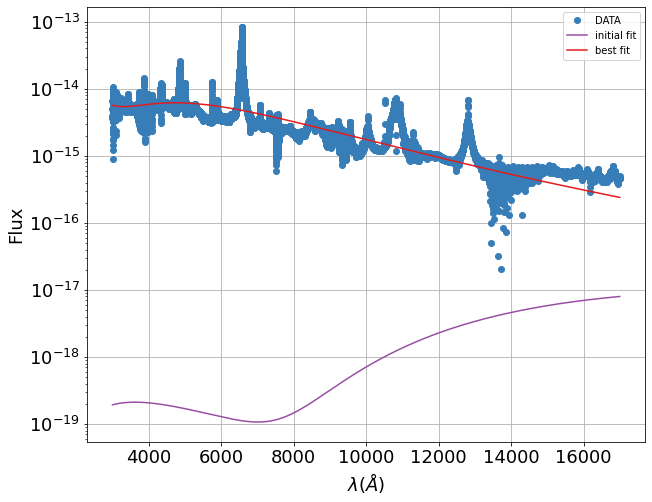

In [42]:
x_data=t8["WL"]
y_data=t8["Flux"]

####initial guess on parameters
TEMPSN=8000
RADIUSSN=1e+13
TEMPDUST=1000
MDUST=0.0001



gmodel=Model(modified_black_body)
result=gmodel.fit(y_data, wl=x_data, TEMPSN=TEMPSN, RADIUSSN=RADIUSSN, TEMPDUST=TEMPDUST, MDUST=MDUST)# , justsn)
print(result.fit_report())

plt.figure(figsize=(10, 8))
plt.plot(x_data, t8["Flux"], 'bo', label='DATA', color=CB_color_cycle[0])
plt.plot(x_data, result.init_fit, label='initial fit', color=CB_color_cycle[5])
plt.plot(x_data, result.best_fit, label='best fit', color=CB_color_cycle[7])
plt.xlabel(r"$\lambda (\AA)$", size=18)
plt.ylabel("Flux", size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.grid()

plt.legend(loc='best')
plt.yscale('log')
# plt.xscale('log')
plt.show()